# Intro to Pandas
This Notebook is based was made to help explain how to start using the Pandas Library for Data Science and Data manipulation in general. 
Please check my Blog that goes along with this notebook for a better explanation:

https://medium.com/@erichhohenstein/intro-to-pandas-9e52f9e77d8a

## 01 Libraries

In [2]:
# These are the libraries we will be using. You can uncomment and run the line below to install them
#!pip install pandas pyodbc matplotlib

In [1]:
import pandas as pd
import pyodbc

## 02 Getting the Data

### • Reading CSV

In [2]:
df = pd.read_csv('netflix.csv')

### • Show first row in Dataframe

In [3]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


### • Reading from Excel 

In [4]:
df = pd.read_excel('netflix.xlsx')
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


### • Reading from SQL table
To create a connection to a SQL database, you need to setup an ODBC connection.
In this blog, there is a step by step guid on how to do just that:
https://medium.com/@erichhohenstein/intro-to-pandas-9e52f9e77d8a

In [ ]:
server = "10.21.120.88"   # Server IP Address
database = "dataBaseName" # Name of the database. The name of the table goes in the Query
username = "usr"          # Username
password = "password"     # Password
#Create connection
cnxn = pyodbc.connect("DRIVER={SQL Server}; SERVER="+server+";DATABASE="+database+";UID="+username+";PWD="+password)
cursor = cnxn.cursor()
# Read with SQL query
df = pd.read_sql("select * from myDataBase",cnxn)


## 03 Data Exploration

### • Showing first N Rows

In [5]:
df = pd.read_csv('netflix.csv')
#Show top 3 rows
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


### • List all column names

In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### • Show count for each distinct element in a column: Value Counts

In [7]:
df["type"].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

### • Getting useful statistics

In [8]:
df["release_year"].describe()

count    6234.00000
mean     2013.35932
std         8.81162
min      1925.00000
25%      2013.00000
50%      2016.00000
75%      2018.00000
max      2020.00000
Name: release_year, dtype: float64

### • Other useful functions
Here are some other neat functions you should try on you own: Group by, min(), max(), mean(), sum()

## 04 Visualizing the data

### • Histogram

<AxesSubplot:>

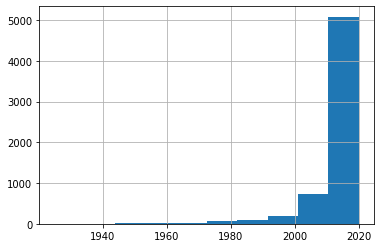

In [9]:
df["release_year"].hist(bins=10)

### • Bar chart

<AxesSubplot:title={'center':'Movies by Country'}>

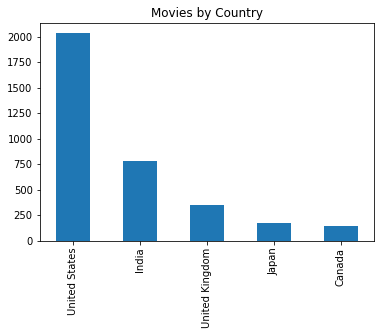

In [10]:
df['country'].value_counts().head(5).plot.bar(title="Movies by Country")

### • Line plot

<AxesSubplot:title={'center':'Movies released in the last 20 years'}>

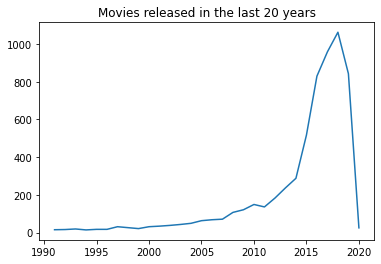

In [28]:
df['release_year'].value_counts().sort_index().tail(30).plot.line(title="Movies released in the last 20 years")


## 05 Transforming the data


### • Merge(Join)

In [ ]:
df = pd.merge(df1, df2, on = "keyColum", how = 'inner')


### • Concatenation
Remember: They must have same column names and same order

In [ ]:
df  = pd.concat([df1, df2])

### • Pivot

In [ ]:
pivot_df = pd.pivot_table(countries_df,  columns = 'Country', values = 'NewConfirmed')

### • String functions

In [ ]:
# Convert column to UPPER CASE
countries_df['Country_upper'] = countries_df['Country'].str.upper()
#  Convert column to lower case
countries_df['CountryCode_lower']=countries_df['CountryCode'].str.lower()
# Finding length of characters in the country column
countries_df['len'] = countries_df['Country'].str.len()

### • Filtering your Dataframe

In [ ]:
#filtering
filteredDf = df[df['release_year']==2020]

### • Apply function

In [36]:
def upper(title):
    newTitle = str(title).upper()
    return newTitle
df['TITLE'] = df['title'].apply(lambda x: upper(x))

## 06 Output the data



### • Write to Excel File

In [39]:
df.to_excel('myData.xlsx',index=False, sheet_name='Sheet1')

### • Write to CSV file

In [40]:
df.to_csv('myData.csv',index=False)

### • Write to SQL table

In [ ]:
df.to_sql('myData', conn, if_exists='replace', index = False)
